In [321]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import metrics

## Preprocessing Data

### Import data

In [322]:
df = pd.read_csv('../Data/PGH/DemandPrediction/ml_df.csv')
df.head(4)

,Unnamed: 0,total_households,median_hh_income,mean_hh_income,population_16yrs+,in_labor_force,civ_labor_force,employed,unemployed,perc_employed,...,wfh,mean_travel_time_to_work,perc_public,perc_alone,perc_walk,perc_other,2018_outflow,2019_outflow,2020_outflow,pred_outflow
0,0,1306,67409,69254,2660,1845,1816,1688,128,0.634586,...,58,23,0.156342,0.638938,0.037168,0.0,0,0,0,78
1,1,1306,67409,69254,2660,1845,1816,1688,128,0.634586,...,58,23,0.156342,0.638938,0.037168,0.0,0,0,0,78
2,2,1306,67409,69254,2660,1845,1816,1688,128,0.634586,...,58,23,0.156342,0.638938,0.037168,0.0,0,0,0,78
3,3,1306,67409,69254,2660,1845,1816,1688,128,0.634586,...,58,23,0.156342,0.638938,0.037168,0.0,0,0,0,78


In [323]:
df.columns

Index(['Unnamed: 0', 'total_households', 'median_hh_income', 'mean_hh_income',
       'population_16yrs+', 'in_labor_force', 'civ_labor_force', 'employed',
       'unemployed', 'perc_employed', 'perc_unemployed', 'Workers_16yrs+',
       'own_alone', 'carpool', 'public_transit', 'walked', 'other', 'wfh',
       'mean_travel_time_to_work', 'perc_public', 'perc_alone', 'perc_walk',
       'perc_other', '2018_outflow', '2019_outflow', '2020_outflow',
       'pred_outflow'],
      dtype='object')

## Remove Some Features

In [324]:
df = df.drop(columns=['Unnamed: 0', 'median_hh_income','mean_hh_income','in_labor_force', 'civ_labor_force', 
                      'employed','unemployed', 'perc_employed', 'perc_unemployed','own_alone', 
                      'carpool', 'public_transit', 'walked', 'other', 'wfh','mean_travel_time_to_work', 
                      'perc_public', 'perc_alone', 'perc_walk','perc_other', '2018_outflow', '2019_outflow', '2020_outflow'])
df.head(4)

,total_households,population_16yrs+,Workers_16yrs+,pred_outflow
0,1306,2660,1695,78
1,1306,2660,1695,78
2,1306,2660,1695,78
3,1306,2660,1695,78


In [325]:
for row in range(len(df)):
    for col in df.columns:
        if df.loc[row][col] == '-' or pd.isna(df.loc[row][col]):
            df.at[row,col] = 0

In [326]:
df['pred_outflow'].mean()

307.4807692307692

In [327]:
df['pred_outflow'].max()

5187

In [329]:
df = df[df['pred_outflow']>0]
df.sample(7)

,total_households,population_16yrs+,Workers_16yrs+,pred_outflow
205,1082,1867,1046,172
204,1082,1867,1046,172
166,1212,1918,1231,332
449,1241,2105,1656,222
128,1132,2255,1229,241
681,378,589,171,71
676,1459,2577,1915,284


In [320]:
df = df[(np.abs(stats.zscore(df)) > 0.5).all(axis=1)]
df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
df

,total_households,population_16yrs+,Workers_16yrs+,pred_outflow
203,0,0,0,654
225,0,0,0,2669
251,2714,5318,3282,2782
253,2714,5318,3282,2170
254,2714,5318,3282,1891
255,2714,5318,3282,2124
328,2119,3641,2676,1681
329,2119,3641,2676,1987
391,1861,2824,1843,1464
392,1861,2824,1843,1043


In [296]:
df['pred_outflow'].mean()

302.8317757009346

In [297]:
df['pred_outflow'].max()

2782

### Split data for training and test

We have a small number of locations that have bike stations. First, we need to filter out any cell that does not have any stations.

In [303]:
X = df.iloc[:, 0:3].to_numpy()
y = df.iloc[:,3].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Perform Feature Scaling

## Defining Models

In [313]:
#Random Forest Classifier
rf_model = RandomForestRegressor(
    n_estimators=30,
    criterion='mae',
    max_depth=15,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='auto',
    max_leaf_nodes=None,
    bootstrap=True,
)

## Training our Random Forest Model

In [314]:
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [315]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 122.02828282828283
Mean Squared Error: 135709.5049158249
Root Mean Squared Error: 368.3877100499213


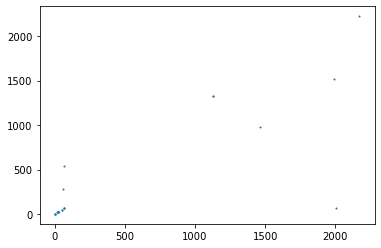

In [302]:
plt.scatter(y_test, y_pred, s=1); plt.show()

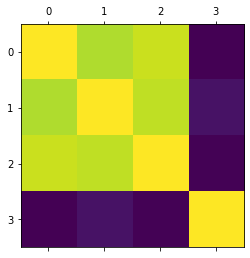

In [274]:
plt.matshow(df.corr())
plt.show()

In [58]:
X_train.shape

(300, 3)